<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/sklearn/10_Rogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

선형 회귀 방정식을 사용한 분류 문제

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

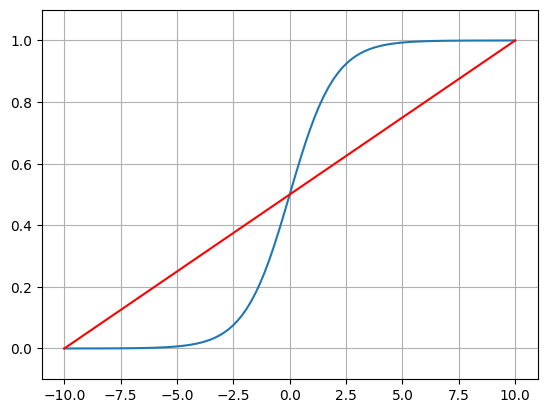

In [15]:
x = np.linspace(-10, 10, 100)
y1 = 1 / (1 + np.exp(-x))
y2 = 0.05*x + 0.5

plt.plot(x, y1)
plt.plot(x, y2, color='red')
plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

## 유방암 데이터

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy :', accuracy_score(y_test, lr_preds))
print('roc_auc :', roc_auc_score(y_test, lr_preds))

accuracy : 0.9766081871345029
roc_auc : 0.9715608465608465


In [23]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    print('solver : {0}\taccuracy : {1:.4f}\troc_auc : {2:.4f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

solver : lbfgs	accuracy : 0.9766	roc_auc : 0.9716
solver : liblinear	accuracy : 0.9825	roc_auc : 0.9795
solver : newton-cg	accuracy : 0.9766	roc_auc : 0.9716
solver : sag	accuracy : 0.9825	roc_auc : 0.9795
solver : saga	accuracy : 0.9825	roc_auc : 0.9795


In [25]:
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 600,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l2', 'l1'],
    'C': [0.01, 0.1, 1, 3, 5, 10]
}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적의 하이퍼 파라미터 : {0}\n최적 평균 정확도 : {1:.4f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적의 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
최적 평균 정확도 : 0.9789
